# Denoising OMM Data: Data Preparation notebook
In this notebook, we will take our HST COSMOS data and degrate them to OMM-like images

The HST resolution for WFC is 0.04 arcsec/pixel. PESTO has a resolution of 0.466 arcsec/pixel. 

We also are going to take cutouts that are 1024x1024 pixels which corresponds to the size of PESTO images.

Steps:

 - Read in data
 
 - Downgrade to a lower resolution
 
 - Take cutouts 

In [2]:
import h5py
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.transform import resize

In [3]:
filename = "cosmos_23.5_128_augmented_denoised.h5"

with h5py.File(filename, "r") as f:
    a_group_key = list(f.keys())[0]
    # Get the data
    galaxies = list(f[a_group_key])[:1000]
print('We have a total of %i galaxies'%len(galaxies))

We have a total of 1000 galaxies


We now have all the galaxies in a list called galaxies. Let's take a look at one!

(0.0, 128.0)

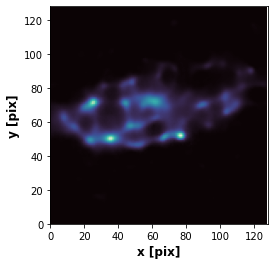

In [5]:
plt.imshow(np.arcsinh(galaxies[1]), cmap='mako')
plt.xlabel('x [pix]', fontweight='bold', fontsize='large')
plt.ylabel('y [pix]', fontweight='bold', fontsize='large')
plt.ylim(0,128)
plt.xlim(0,128)

## Making OMM-like images
In order to make this more applicable to OMM images, we are going to make the image 1024x1024 pixels

In [6]:
galaxies_OMM = []  # List of galaxies resized to OMM sizes
for galaxy in galaxies:  # Step through all galaxies
    galaxies_OMM.append(resize(galaxy, (1024, 1024)))

Text(0, 0.5, 'y [pix]')

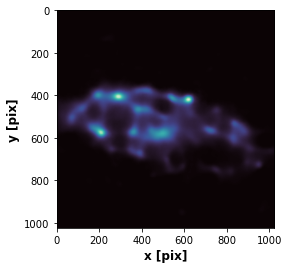

In [7]:
plt.imshow(np.arcsinh(galaxies_OMM[1]), cmap='mako')
plt.xlabel('x [pix]', fontweight='bold', fontsize='large')
plt.ylabel('y [pix]', fontweight='bold', fontsize='large')